# **Car price prediction**

In [40]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#apis
from sklearn.impute import SimpleImputer
#modules

from sklearn.preprocessing import StandardScaler

#normal lib
from statistics import mean
import joblib
import seaborn as sns
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# **STEP 1. LOOK AT THE BIG PICTURE**


# **Step 2. GET THE DATA**


In [41]:
raw_data = pd.read_csv(r'car_price_prediction.csv')

# **Step 3.EDA**

## 3.1. Data Cleanup

In [42]:
#data cleanup
print("Null values: ")
print(raw_data.isnull().sum())

Null values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [43]:
#duplicae rows
print("Duplicate rows: ")

duplicate_rows = raw_data[raw_data.duplicated()]
print(duplicate_rows)

Duplicate rows: 
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG   

In [44]:
# Remove duplicate rows
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [45]:
#drop the ID column (EDIT GENERAL)
raw_data = raw_data.drop(columns = "ID")  

In [46]:
# EDIT GENERAL
raw_data['Levy'] = raw_data['Levy'].replace('-', np.nan) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

In [47]:
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
raw_data['Levy'] = impute.fit_transform(raw_data['Levy'].values.reshape(-1,1))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

In [48]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

In [49]:
# extracting the enginer volume (EDIT GENREAL)
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [50]:
#reformat data (EDIT GENERAL)
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(float)

In [51]:
raw_data['Age'] = 2024 - raw_data['Prod. year']

# Assuming raw_data is your DataFrame
raw_data = raw_data.drop(columns=['Prod. year'])

In [52]:
raw_data['Doors'] = raw_data['Doors'].astype('category')

In [53]:
print("Head: ")
print(raw_data.head())
print("Data insight: ")
raw_data.describe()

Head: 
   Price         Levy Manufacturer    Model   Category Leather interior  \
0  13328  1399.000000        LEXUS   RX 450       Jeep              Yes   
1  16621  1018.000000    CHEVROLET  Equinox       Jeep               No   
2   8467   906.299205        HONDA      FIT  Hatchback               No   
3   3607   862.000000         FORD   Escape       Jeep              Yes   
4  11726   446.000000        HONDA      FIT  Hatchback              Yes   

  Fuel type  Engine volume   Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5  186005.0        6.0     Automatic          4x4   
1    Petrol            3.0  192000.0        6.0     Tiptronic          4x4   
2    Petrol            1.3  200000.0        4.0      Variator        Front   
3    Hybrid            2.5  168966.0        4.0     Automatic          4x4   
4    Petrol            1.3   91901.0        4.0     Automatic        Front   

  Doors             Wheel   Color  Airbags Turbo  Age  
0   4-5        Le

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,906.299205,2.306251,1.555373e+06,4.580216,6.568379,13.085764
std,1.921356e+05,387.152014,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,1.000000e+00,87.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,5.331000e+03,730.000000,1.800000,7.019575e+04,4.000000,4.000000,9.000000
50%,1.317200e+04,906.299205,2.000000,1.264000e+05,4.000000,6.000000,12.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,4.000000,12.000000,15.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


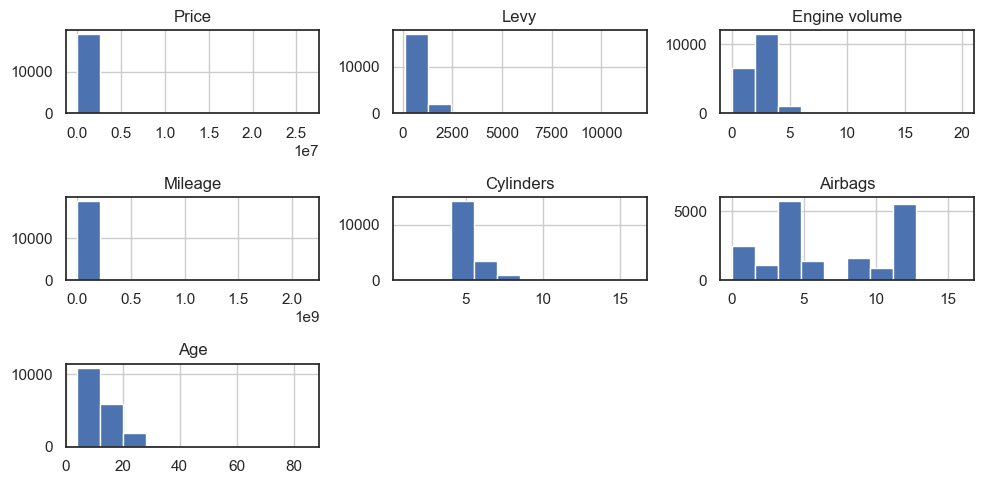

In [54]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


In [55]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)


Summary
        Variable   Skewness     Kurtosis          Mean         Median  \
0           Levy   6.555244   124.414365  9.062992e+02     906.299205   
1  Engine volume   2.208051    19.555731  2.306251e+00       2.000000   
2        Mileage  38.578517  1572.672121  1.555373e+06  126400.000000   
3      Cylinders   2.107707     6.587165  4.580216e+00       4.000000   
4        Airbags   0.086344    -1.332103  6.568379e+00       6.000000   
5            Age   2.088595    11.450244  1.308576e+01      12.000000   

        Std Dev  Potential Normal  
0  3.871520e+02             False  
1  8.775910e-01             False  
2  4.880221e+07             False  
3  1.200223e+00             False  
4  4.322323e+00              True  
5  5.665749e+00             False  


# **Outlier**

In [56]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = remove_outliers_iqr(raw_data['Price'], factor=1.5)
price_column = raw_data['Price']

outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
raw_data = raw_data[~outliers]


Number of outliers: 1055


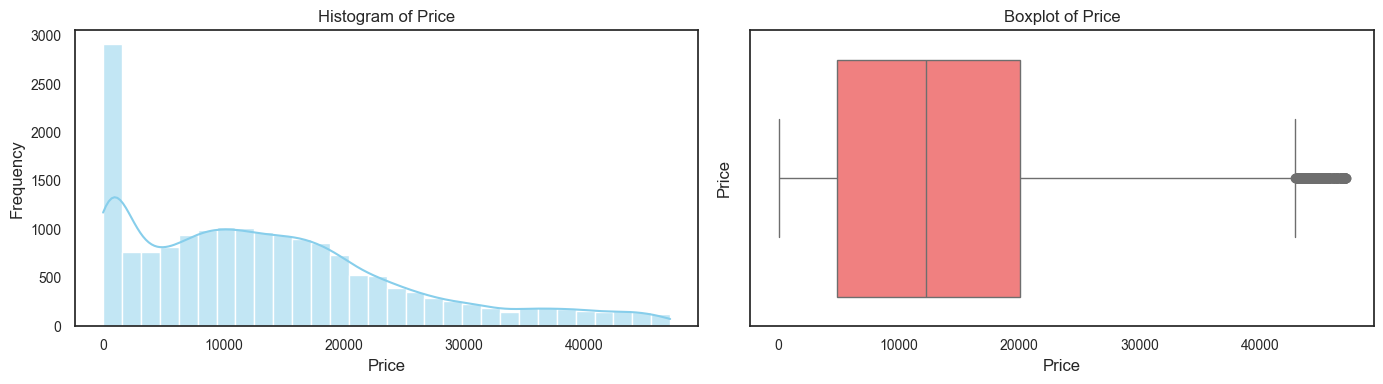

In [57]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(raw_data['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=raw_data['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

raw_data = raw_data[raw_data['Price'] >= 500]

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    raw_data, count = remove_outliers_iqr(raw_data, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2302
Engine volume: 292
Mileage: 529
Cylinders: 2321


In [59]:
raw_data.info() # after removal


<class 'pandas.core.frame.DataFrame'>
Index: 10792 entries, 2 to 19234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             10792 non-null  int64   
 1   Levy              10792 non-null  float64 
 2   Manufacturer      10792 non-null  object  
 3   Model             10792 non-null  object  
 4   Category          10792 non-null  object  
 5   Leather interior  10792 non-null  object  
 6   Fuel type         10792 non-null  object  
 7   Engine volume     10792 non-null  float64 
 8   Mileage           10792 non-null  float64 
 9   Cylinders         10792 non-null  float64 
 10  Gear box type     10792 non-null  object  
 11  Drive wheels      10792 non-null  object  
 12  Doors             10792 non-null  category
 13  Wheel             10792 non-null  object  
 14  Color             10792 non-null  object  
 15  Airbags           10792 non-null  int64   
 16  Turbo             10792 non

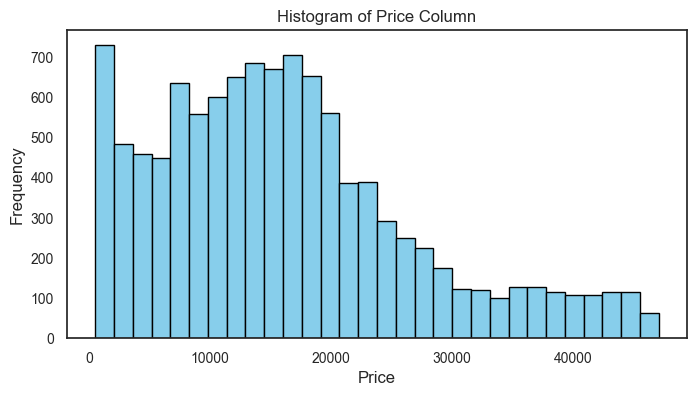

In [60]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(raw_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

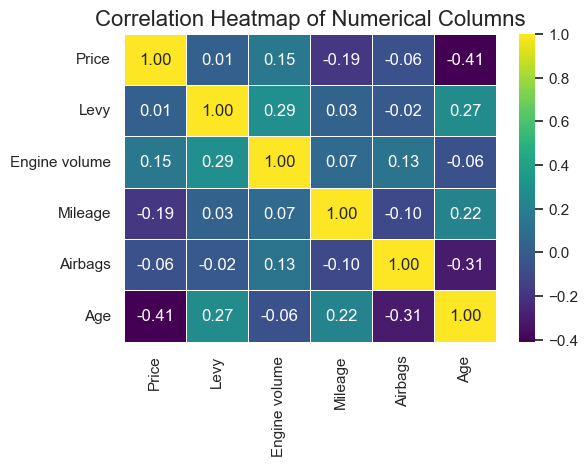

In [61]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()


## **Outlier**
THIS IS SAMPLE, REMEMBER TO PARAPHARSE
Leaveoneout encoding for Manufacturer, Model and Category. Rest is one hot encoded

Leave-One-Out Encoding (LOO Encoding) is a technique used in feature engineering for categorical variables, particularly in the context of supervised machine learning. It involves encoding categorical variables by calculating the mean of the target variable for each category, excluding the current instance being encoded. The process is as follows:

For each instance in a category, compute the mean of the target variable for all other instances in the same category. Replace the original categorical value with the computed mean for that instance. This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

Reduced Data Leakage:

LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

Preservation of Information:

By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

Effective for Low Cardinality:

Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

Adaptability:

LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

Avoidance of Overfitting:

When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy.

In [62]:
from category_encoders import LeaveOneOutEncoder

# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
raw_data_encoded = encoder.fit_transform(raw_data[columns_to_encode], raw_data['Price'])

# Concatenate the encoded columns with the original DataFrame
raw_data = pd.concat([raw_data, raw_data_encoded.add_suffix('_LOO')], axis=1)

In [63]:
raw_data.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

# Identify columns with datatype 'object' or 'category'
columns_to_encode = raw_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
raw_data_encoded = pd.get_dummies(raw_data, columns=columns_to_encode, drop_first=True)

raw_data_encoded


,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,False,False,False,False,False,False,False,False,False,False
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,False,False,False,False,False,False,False,False,False,True
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,False,False,False,False,False,True,False,False,False,True
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,False,False,False,False,True,False,False,False,False,False


In [64]:
# Loop through columns
for column in raw_data_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if raw_data_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        raw_data_encoded[column] = raw_data_encoded[column].astype(int)

raw_data_encoded



,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,0,0,0,0,0,0,0,0,0,0
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,0,0,0,0,0,0,0,0,0,1
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,0,0,0,0,0,1,0,0,0,1
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,0,0,0,0,1,0,0,0,0,0


# Data Preparation

## Helper Functions

In [65]:
from sklearn.metrics import mean_squared_error

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

def store_model(model, model_name=""):
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

In [66]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Price) and independent variables
X = raw_data_encoded.drop(columns=['Price','Cylinders'])
y = raw_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(8633, 38)
(8633,)
(2159, 38)
(2159,)


# Model Training

## Linear Regression

In [67]:
new_training = 0

if new_training: 
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="LinearRegression")
else:
    model = load_model("LinearRegression")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
# Analyze performance
print('_____________LINEAR REGRESSION MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________LINEAR REGRESSION MODEL PERFORMANCE_________

 R2 Score (train data): 0.5197318257238226

 RMSE (train data): 7427.033954716203

Predictions:  [ 3126.1 27990.1 13787.7 21173.7 17597.8 13199.  35294.  15761.3 14402.3]
Labels:       [3450, 18189, 13589, 15524, 10976, 16099, 43868, 14740, 15681]


## Ridge Regression

In [68]:
new_training = 0

if new_training: 
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="Ridge")
else:
    model = load_model("Ridge")

# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
# Analyze performance
print('_____________RIDGE MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RIDGE MODEL PERFORMANCE_________

 R2 Score (train data): 0.5197318254583194

 RMSE (train data): 7427.03395676912

Predictions:  [ 3126.3 27990.1 13787.7 21173.4 17597.8 13199.  35293.9 15761.1 14402.3]
Labels:       [3450, 18189, 13589, 15524, 10976, 16099, 43868, 14740, 15681]


## Decision Tree

In [69]:
new_training = 0

if new_training: 
    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="DecisionTreeRegressor")
else:
    model = load_model("DecisionTreeRegressor")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
# Analyze performance
print('_____________DECISION TREE REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________DECISION TREE REGRESSOR PERFORMANCE_________

 R2 Score (train data): 1.0

 RMSE (train data): 0.0

Predictions:  [ 3450. 18189. 13589. 15524. 10976. 16099. 43868. 14740. 15681.]
Labels:       [3450, 18189, 13589, 15524, 10976, 16099, 43868, 14740, 15681]


## Random Forest

In [70]:
new_training = 0

if new_training:
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")


# Calculate R2 score and RMSE
r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score (train data): 0.9975693561032488

 RMSE (train data): 528.3651610023334

Predictions:  [ 3456.6 18199.5 13589.4 15525.7 10976.  16115.1 43868.1 14741.9 15681. ]
Labels:       [3450, 18189, 13589, 15524, 10976, 16099, 43868, 14740, 15681]


## XGBoost

In [71]:
new_training = 0

if new_training:
  model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  model.fit(X_train_scaled, y_train)
  store_model(model, model_name="XGBoost")
else:
  model = load_model("XGBoost")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR XGBOOST_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR XGBOOST_________

 R2 Score (train data): 0.9978114366531372

 RMSE (train data): 501.36105955805147

Predictions:  [ 3680.1 18084.3 13916.5 15776.6 10929.8 16313.7 43614.7 14372.3 15705.1]
Labels:       [3450, 18189, 13589, 15524, 10976, 16099, 43868, 14740, 15681]


## Neural Network

In [72]:
new_training = 0

if new_training:
    # Define the neural network architecture
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=True
    )
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="NeuralNetwork")
else:
    model = load_model("NeuralNetwork")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR NEURAL NETWORK_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

Iteration 1, loss = 107744153.29420999
Validation score: 0.549970
Iteration 2, loss = 26535492.79906971
Validation score: 0.586982
Iteration 3, loss = 24392549.83313074
Validation score: 0.598312
Iteration 4, loss = 23286278.03731154
Validation score: 0.617322
Iteration 5, loss = 22345214.36636737
Validation score: 0.628354
Iteration 6, loss = 21743119.63362652
Validation score: 0.637218
Iteration 7, loss = 21182590.93704355
Validation score: 0.644064
Iteration 8, loss = 20608718.66773948
Validation score: 0.653014
Iteration 9, loss = 20064842.40373233
Validation score: 0.656490
Iteration 10, loss = 19600946.09918204
Validation score: 0.661382
Iteration 11, loss = 19158858.43512056
Validation score: 0.668304
Iteration 12, loss = 18737189.54465749
Validation score: 0.674525
Iteration 13, loss = 18378175.15802790
Validation score: 0.678564
Iteration 14, loss = 17892720.07206531
Validation score: 0.680902
Iteration 15, loss = 17566846.58262287
Validation score: 0.687548
Iteration 16, loss

In [73]:
from sklearn.metrics import make_scorer

# Custom scorer for RMSE
rmse_scorer = make_scorer(root_mean_squared_error)

print('\n____________ K-fold cross validation ____________')

run_new_evaluation = 0

# create table
table = {'Model': [], 'RMSE': [], 'R-squared': []}

if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=37)

    # DECISION TREE
    model_name = "DecisionTreeRegressor"
    model = DecisionTreeRegressor(random_state=42)
    
    # Cross-validation scores for RMSE and R²
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'DecisionTreeRegressor RMSE: {np.mean(rmse_scores):.2f}')
    print(f'DecisionTreeRegressor R²: {np.mean(r2_scores):.2f}\n')

    # RANDOM FOREST
    model_name = "RandomForest"
    model = RandomForestRegressor(random_state=42)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'RandomForest RMSE: {np.mean(rmse_scores):.2f}')
    print(f'RandomForest R²: {np.mean(r2_scores):.2f}\n')

    # RIDGE
    model_name = "Ridge"
    model = Ridge(alpha=0.1)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Ridge RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Ridge R²: {np.mean(r2_scores):.2f}\n')

    # LINEAR
    model_name = "Linear"
    model = LinearRegression()

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Linear RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Linear R²: {np.mean(r2_scores):.2f}\n')

    # XGBOOST
    model_name = "XGBoost"
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'XGBoost RMSE: {np.mean(rmse_scores):.2f}')
    print(f'XGBoost R²: {np.mean(r2_scores):.2f}\n')

    # NN
    model_name = "NeuralNetwork"
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=False
    )

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'NN RMSE: {np.mean(rmse_scores):.2f}')
    print(f'NN R²: {np.mean(r2_scores):.2f}\n')

else:
    # Load saved RMSE and R² scores for each model
    models = ["DecisionTreeRegressor", "RandomForest", "Ridge", "Linear", "XGBoost", "NeuralNetwork"]

    for model_name in models:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        r2_scores = joblib.load('saved_objects/' + model_name + '_r2.pkl')
        print(f"\n{model_name} RMSE: {np.mean(rmse_scores):.2f}")
        print(f"{model_name} R²: {np.mean(r2_scores):.2f}\n")


____________ K-fold cross validation ____________
DecisionTreeRegressor RMSE: 1987.93
DecisionTreeRegressor R²: 0.96

RandomForest RMSE: 1543.38
RandomForest R²: 0.98

Ridge RMSE: 7452.76
Ridge R²: 0.52

Linear RMSE: 7452.76
Linear R²: 0.52

XGBoost RMSE: 1795.49
XGBoost R²: 0.97

NN RMSE: 5415.74
NN R²: 0.74



In [74]:
# Cái này của Anh Đức, Tài chưa xo

# from sklearn.model_selection import GridSearchCV

# # Adjust the param_grid for RandomForestRegressor
# param_grid = {
#     'n_estimators': [100, 150, 200],       # Number of trees
#     # Minimum number of samples required to split a node
#     'min_samples_split': [2, 5, 10],
#     # Minimum number of samples required at a leaf node
#     'min_samples_leaf': [1, 2, 4],
#     # Whether bootstrap samples are used when building trees
#     'bootstrap': [True, False]
# }

# # Initialize the RandomForestRegressor
# model = RandomForestRegressor(random_state=42)

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                            scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# # Fit the grid search model on the training data
# grid_search.fit(X_train_scaled, y_train)

# # save the grid search 
# joblib.dump(
#     grid_search, 'saved_objects/RandomForestRegressor_gridsearch.pkl')


# # Get the best parameters and model
# print(f"Best Parameters: {grid_search.best_params_}")
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test_scaled)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Test RMSE: {rmse}")

In [75]:
# from sklearn.model_selection import GridSearchCV

# def print_search_result(random_search):
#     print('Best hyperparameter combination: ', random_search.best_params_)
#     print('Best rmse: ', np.sqrt(-random_search.best_score_))
#     print('Best estimator: ', random_search.best_estimator_) # NOTE: require refit=True in  SearchCV
#     print('Performance of hyperparameter combinations:')
#     cv_results = random_search.cv_results_
#     for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
#         print('rmse =', np.sqrt(-mean_score).round(decimals=1), params)

# new_run = 0

# if new_run:
#     # Adjust the param_grid for RandomForestRegressor
#     param_grid = {
#         'n_estimators': [100, 150, 200], # Number of trees
#         'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
#         'min_samples_leaf': [1, 2, 4],# Minimum number of samples required at a leaf node
#         'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
#     }

#     # Initialize the RandomForestRegressor
#     model = RandomForestRegressor(random_state=42)

#     # Initialize the GridSearchCV object
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

#     # Fit the grid search model on the training data
#     grid_search.fit(X_train_scaled, y_train)

#     # save the grid search
#     joblib.dump(
#         grid_search, 'saved_objects/RandomForestRegressor_gridsearch.pkl')
#     #print the results
#     print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
#     print_search_result(grid_search)
# else:
#     grid_search = joblib.load('saved_objects/RandomForestRegressor_gridsearch.pkl')
#     print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
#     print_search_result(grid_search)


In [76]:
from sklearn.model_selection import RandomizedSearchCV

def print_search_result(random_search):
    print('Best hyperparameter combination: ', random_search.best_params_)
    print('Best rmse: ', np.sqrt(-random_search.best_score_))
    print('Best estimator: ', random_search.best_estimator_) # NOTE: require refit=True in  SearchCV
    print('Performance of hyperparameter combinations:')
    cv_results = random_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params)

new_run = 0

if new_run:
    # Adjust the param_grid for RandomizedSearchCV with distributions
    param_dist = {
        'n_estimators': [100, 200, 250],       # Number of trees
        'min_samples_split': [2, 4, 5],       # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 3, 5],         # Minimum number of samples required at a leaf node
        'bootstrap': [False, True],            # Whether bootstrap samples are used when building trees
        'max_depth': [None, 10, 20]
    }

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(random_state=42)

    # Initialize the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       cv=5, n_jobs=-1, verbose=1, random_state=42)

    # Fit the random search model on the training data
    random_search.fit(X_train_scaled, y_train)

    # save the random search
    joblib.dump(
        random_search, 'saved_objects/RandomForestRegressor_randomsearch.pkl')

    # Print the results
    print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
    print_search_result(random_search)

else:
    random_search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
    print("\n ---------------------------Fine-tune Random Forest Regressor---------------------------")
    print_search_result(random_search)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

 ---------------------------Fine-tune Random Forest Regressor---------------------------
Best hyperparameter combination:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best rmse:  1525.428059444248
Best estimator:  RandomForestRegressor(n_estimators=200, random_state=42)
Performance of hyperparameter combinations:
rmse = 1752.4 {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 20, 'bootstrap': True}
rmse = 1730.5 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
rmse = 1852.8 {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 10, 'bootstrap': True}
rmse = 1845.0 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
rmse = 1617.7 {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3,

# STEP 7: Analyze and test model

----------------Features in dataset--------------------
 Index(['Levy', 'Engine volume', 'Mileage', 'Airbags', 'Age',
       'Manufacturer_LOO', 'Model_LOO', 'Category_LOO', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_4-5', 'Doors_>5',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Turbo_Yes'],
      dtype='object')
                     Feature    Importance
7               Category_LOO  5.741526e-01
6                  Model_LOO  2.950843e-01
4                        Age  9.124203e-02
5           Manufac

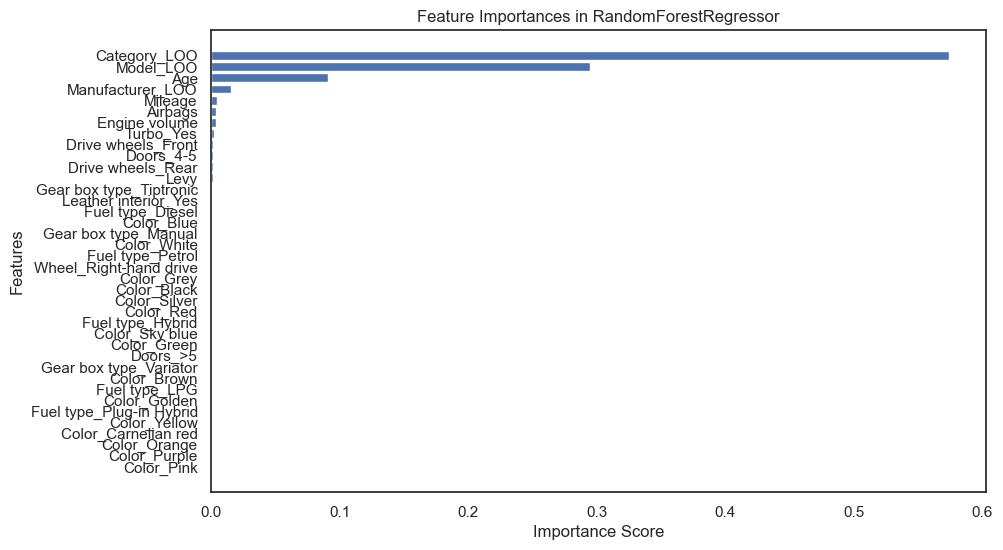

In [77]:
# load grid search and get best model
# grid_search = joblib.load('saved_objects/RandomForestRegressor_gridsearch.pkl')
# best_model2 = grid_search.best_estimator_

random_search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
best_model = random_search.best_estimator_

# Retrieve feature importances
feature_importances = best_model.feature_importances_

# get the features names in the dataset
feature_names = X_train.columns
print('----------------Features in dataset--------------------\n', feature_names)


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances for visulization
plt.figure(figsize=(10, 6))
# create the horizontal bar chart
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances in RandomForestRegressor")
plt.gca().invert_yaxis()
plt.show()


In [78]:
print('BEST MODEL FOR THIS DATASET: ', best_model)
store_model(best_model, model_name="BEST MODEL")

r2score, rmse = r2score_and_rmse(
    best_model, X_test_scaled, y_test)
print('\n ------------------Performance of Best Model on Test dataset-----------------')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 7.3.2 Predict labels for some test instances
print("\n----------------------Test data---------------------- \n", X_test.iloc[0:9])
print("\nPredictions: ", best_model.predict(
    X_test_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_test[0:9]), '\n')


BEST MODEL FOR THIS DATASET:  RandomForestRegressor(n_estimators=200, random_state=42)

 ------------------Performance of Best Model on Test dataset-----------------
R2 score (on test data, best=1): 0.9885129166114108
Root Mean Square Error:  1157.4

----------------------Test data---------------------- 
              Levy  Engine volume   Mileage  Airbags  Age  Manufacturer_LOO  \
8137   906.299205            1.6   40000.0        2    7      16113.833866   
16350  531.000000            1.6  151136.0        4   12      20633.004199   
13159  906.299205            1.6  200000.0        2   24      15874.481562   
16411  906.299205            1.3  229000.0        4   21      13130.213716   
14285  585.000000            1.8  105328.0       12   11      15194.670880   
14954  640.000000            2.0  110190.0        4   11      30439.870886   
885    906.299205            2.5  135000.0        2   17      12133.370558   
5466   906.299205            1.3  190500.0        4   23      15191.6